In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr


In [27]:

# Load 24-hr average concentrations for 2019-07-07
ds_step = xr.open_dataset('/net/fs11/d0/emfreese/GCrundirs/IRF_runs/no_rrtm_grid_comp/stretch/step/OutputDir/GEOSChem.SpeciesConc.20160101_0000z.nc4')
ds_base = xr.open_dataset('/net/fs11/d0/emfreese/GCrundirs/IRF_runs/no_rrtm_grid_comp/stretch/base/OutputDir/GEOSChem.SpeciesConc.20160101_0000z.nc4')


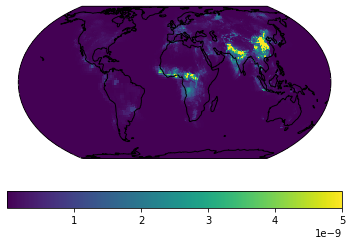

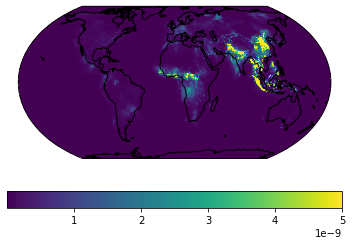

In [31]:
for ds in [ds_base, ds_step]:
    # Setup axes
    ax = plt.axes(projection=ccrs.EqualEarth())
    ax.set_global()
    ax.coastlines()

    # Plot data on each face
    for face_idx in range(6):
        x = ds.corner_lons.isel(nf=face_idx)
        y = ds.corner_lats.isel(nf=face_idx)
        v = ds['SpeciesConc_BCPO'].isel(lev = 0, time = 0).isel(nf=face_idx)
        pcm = plt.pcolormesh(
            x, y, v,
            transform=ccrs.PlateCarree(),
            vmin=1e-14, vmax=5e-9
        )

    plt.colorbar(pcm, orientation='horizontal')
    plt.show()